In [21]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
import pandas as pd 
spark=SparkSession.builder.appName('basics').getOrCreate()
df=spark.read.load('A2.csv',format="csv",header="true")

In [22]:
df.show()

+--------------------+---------+--------------------+-------+----+-----+--------------------+-----+---------------------+------------------------------------+---------------------------+
|      Indicator_name|indicator|        Country_name|country|time|value|                note|level|Livestock_Primary_egg|Beef_and_bufallo(kilograms_per_year)|Poultry(kilograms_per_year)|
+--------------------+---------+--------------------+-------+----+-----+--------------------+-----+---------------------+------------------------------------+---------------------------+
|Global Hunger Ind...|IFPRI-GHI|             Belarus|    BLR|2000|  2.5|In order to have ...|    a|                  2.5|                                 4.8|                       0.63|
|Global Hunger Ind...|IFPRI-GHI|               Chile|    CHL|2000|  2.5|In order to have ...|    a|                  2.5|                                5.01|                       0.66|
|Global Hunger Ind...|IFPRI-GHI|              Kuwait|    KWT|2000

In [23]:
df.columns

['Indicator_name',
 'indicator',
 'Country_name',
 'country',
 'time',
 'value',
 'note',
 'level',
 'Livestock_Primary_egg',
 'Beef_and_bufallo(kilograms_per_year)',
 'Poultry(kilograms_per_year)']

In [25]:
df.na.drop().show()

+--------------------+---------+------------+-------+----+-----+--------------------+-----+---------------------+------------------------------------+---------------------------+
|      Indicator_name|indicator|Country_name|country|time|value|                note|level|Livestock_Primary_egg|Beef_and_bufallo(kilograms_per_year)|Poultry(kilograms_per_year)|
+--------------------+---------+------------+-------+----+-----+--------------------+-----+---------------------+------------------------------------+---------------------------+
|Global Hunger Ind...|IFPRI-GHI|     Belarus|    BLR|2000|  2.5|In order to have ...|    a|                  2.5|                                 4.8|                       0.63|
|Global Hunger Ind...|IFPRI-GHI|       Chile|    CHL|2000|  2.5|In order to have ...|    a|                  2.5|                                5.01|                       0.66|
|Global Hunger Ind...|IFPRI-GHI|      Kuwait|    KWT|2000|  2.5|In order to have ...|    a|              

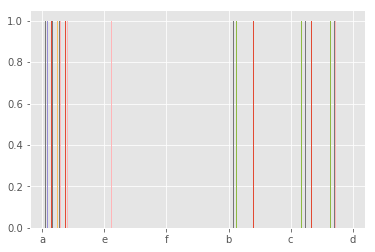

In [49]:
import pandas
import matplotlib.pyplot as plt
hunger=pandas.read_csv("A2.csv",keep_default_na=False)
plt.hist(hunger["level"])
plt.show()

In [50]:
df.select("value").show()

+-----+
|value|
+-----+
|  2.5|
|  2.5|
|  2.5|
|  2.5|
|  9.1|
|  7.3|
| 52.1|
| 65.1|
| 21.5|
|  6.6|
| 18.3|
| 27.5|
| 36.7|
| 46.3|
| 36.1|
|  8.2|
|  9.8|
| 30.3|
| null|
| 33.4|
+-----+
only showing top 20 rows



In [54]:
df.na.drop().show()

+--------------------+---------+------------+-------+----+-----+--------------------+-----+---------------------+------------------------------------+---------------------------+
|      Indicator_name|indicator|Country_name|country|time|value|                note|level|Livestock_Primary_egg|Beef_and_bufallo(kilograms_per_year)|Poultry(kilograms_per_year)|
+--------------------+---------+------------+-------+----+-----+--------------------+-----+---------------------+------------------------------------+---------------------------+
|Global Hunger Ind...|IFPRI-GHI|     Belarus|    BLR|2000|  2.5|In order to have ...|    a|                  2.5|                                 4.8|                       0.63|
|Global Hunger Ind...|IFPRI-GHI|       Chile|    CHL|2000|  2.5|In order to have ...|    a|                  2.5|                                5.01|                       0.66|
|Global Hunger Ind...|IFPRI-GHI|      Kuwait|    KWT|2000|  2.5|In order to have ...|    a|              

In [56]:
df.select("level","Livestock_Primary_egg","Beef_and_bufallo(kilograms_per_year)","Poultry(kilograms_per_year)").show()

+-----+---------------------+------------------------------------+---------------------------+
|level|Livestock_Primary_egg|Beef_and_bufallo(kilograms_per_year)|Poultry(kilograms_per_year)|
+-----+---------------------+------------------------------------+---------------------------+
|    a|                  2.5|                                 4.8|                       0.63|
|    a|                  2.5|                                5.01|                       0.66|
|    a|                  2.5|                                5.06|                       0.66|
|    a|                  2.5|                                5.03|                       0.67|
|    a|               2.4615|                                4.99|                        0.7|
|    a|                  2.4|                                6.81|                       0.72|
|    e|               2.3847|                                6.36|                       0.74|
|    f|               2.4964|                     

In [64]:
pandas_df = df.toPandas()
df1=pandas.DataFrame(pandas_df[['country','value','level','time','Poultry(kilograms_per_year)','Beef_and_bufallo(kilograms_per_year)','Livestock_Primary_egg']])
print(df1)

    country value level  time Poultry(kilograms_per_year)  \
0       BLR   2.5     a  2000                        0.63   
1       CHL   2.5     a  2000                        0.66   
2       KWT   2.5     a  2000                        0.66   
3       LTU   2.5     a  2000                        0.67   
4       LBN   9.1     a  2000                         0.7   
5       SVK   7.3     a  2000                        0.72   
6       AFG  52.1     e  2000                        0.74   
7       AGO  65.1     f  2000                        0.76   
8       ALB  21.5     b  2000                        0.89   
9       ARG   6.6     a  2000                        0.87   
10      ARM  18.3     b  2000                        0.85   
11      AZE  27.5     c  2000                        0.82   
12      BEN  36.7     d  2000                        0.84   
13      BFA  46.3     e  2000                        0.81   
14      BGD  36.1     d  2000                        0.83   
15      BGR   8.2     a 

In [63]:
a=0
b=0
c=0
for i in range(len(hunger.value)):
    if hunger.value[i]!="" and float(hunger.value[i])<10:
        a+=1
    elif hunger.value[i]!="" and float(hunger.value[i])>=10 and float(hunger.value[i])<20:
        b+=1
    else:
        c+=1
print("Their number and share after three groups by hunger level:")
print(a/(a+b+c),b/(a+b+c),c/(a+b+c))
print(a,b,c)

Their number and share after three groups by hunger level:
0.2725118483412322 0.24644549763033174 0.48104265402843605
115 104 203


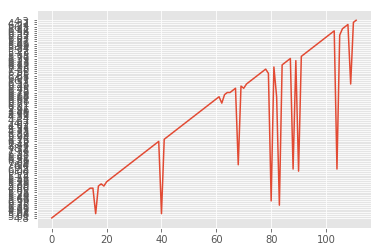

In [65]:
plt.plot(df1[0:112]['Beef_and_bufallo(kilograms_per_year)'])
plt.show()

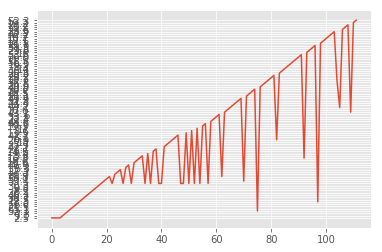

In [70]:
hunger=pandas.read_csv("A2.csv",keep_default_na=False)
df1=pandas.DataFrame(hunger[['country','value','level','time','Poultry(kilograms_per_year)','Beef_and_bufallo(kilograms_per_year)','Livestock_Primary_egg']])
plt.plot(df1[0:112]['value'])
plt.show()

In [34]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import HiveContext
from pyspark.sql import SparkSession
from pyspark.ml.clustering import KMeans
import pyspark.ml.clustering as clus
import pandas as pd 
from pyspark.sql.types import IntegerType
from pyspark.ml.feature import StandardScaler
spark=SparkSession.builder.appName('basics').getOrCreate()
df=spark.read.load('A2.csv',format="csv",header="true")

data=df.select('value','Livestock_Primary_egg','Beef_and_bufallo(kilograms_per_year)','Poultry(kilograms_per_year)')
data1=data.na.drop()
data1 = data1.withColumn("value", data1["value"].cast(IntegerType()))
data1 = data1.withColumn("Livestock_Primary_egg", data1["Livestock_Primary_egg"].cast(IntegerType()))
data1 = data1.withColumn("Beef_and_bufallo(kilograms_per_year)", data1["Beef_and_bufallo(kilograms_per_year)"].cast(IntegerType()))
data1 = data1.withColumn("Poultry(kilograms_per_year)", data1["Poultry(kilograms_per_year)"].cast(IntegerType()))
assembler1=VectorAssembler(inputCols=['value','Livestock_Primary_egg','Beef_and_bufallo(kilograms_per_year)','Poultry(kilograms_per_year)'],
                        outputCol="features")
wholedata=assembler1.transform(data1)
train,test=wholedata.randomSplit([0.8,0.2],seed=12)
kmeans=KMeans(k=6,seed=1)
model=kmeans.fit(train)


In [33]:

# Evaluate clustering by computing Within Set Sum of Squared Errors.
wssse = model.computeCost(train)
print("Within Set Sum of Squared Errors = " + str(wssse))
 
# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Within Set Sum of Squared Errors = 37471.6457879751
Cluster Centers: 
[42.06153846  5.6         7.10769231  3.92307692]
[16.73684211  3.05263158 11.21052632 53.42105263]
[8.65048544 5.86407767 6.09708738 3.59223301]
[18.56  4.72 77.16  8.28]
[24.90625   5.78125   6.09375   3.203125]
[16.9   4.66 29.74 22.52]


In [35]:
model=kmeans.fit(test)
wssse = model.computeCost(train)
print("Within Set Sum of Squared Errors = " + str(wssse))
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Within Set Sum of Squared Errors = 73840.61996079478
Cluster Centers: 
[6.21428571 7.28571429 6.64285714 5.71428571]
[14.88235294  4.41176471  5.41176471  3.58823529]
[16.35714286  2.85714286 10.78571429 50.07142857]
[43.66666667  3.22222222  4.          3.22222222]
[29.13333333  5.4         9.6         5.33333333]
[ 9.88888889  5.88888889 47.66666667 11.88888889]


In [41]:
train.describe().show()
test.describe().show()

+-------+------------------+---------------------+------------------------------------+---------------------------+
|summary|             value|Livestock_Primary_egg|Beef_and_bufallo(kilograms_per_year)|Poultry(kilograms_per_year)|
+-------+------------------+---------------------+------------------------------------+---------------------------+
|  count|               326|                  326|                                 326|                        326|
|   mean|              21.0|    5.358895705521473|                  15.671779141104295|          9.748466257668712|
| stddev|14.201625042443341|    3.343424868858964|                  20.117797736034486|         13.807397597289185|
|    min|                 2|                    1|                                   2|                          0|
|    max|                65|                   16|                                  89|                         63|
+-------+------------------+---------------------+----------------------

In [42]:
data1.describe().show()

+-------+------------------+---------------------+------------------------------------+---------------------------+
|summary|             value|Livestock_Primary_egg|Beef_and_bufallo(kilograms_per_year)|Poultry(kilograms_per_year)|
+-------+------------------+---------------------+------------------------------------+---------------------------+
|  count|               404|                  404|                                 404|                        404|
|   mean|20.628712871287128|    5.264851485148514|                  14.985148514851485|         10.485148514851485|
| stddev|14.126889248097838|    3.349997552344985|                   19.23318516628017|         14.784046032784016|
|    min|                 2|                    1|                                   2|                          0|
|    max|                65|                   17|                                  89|                         63|
+-------+------------------+---------------------+----------------------

+-----+---------------------+------------------------------------+---------------------------+-------------------+----------+
|value|Livestock_Primary_egg|Beef_and_bufallo(kilograms_per_year)|Poultry(kilograms_per_year)|           features|prediction|
+-----+---------------------+------------------------------------+---------------------------+-------------------+----------+
|    2|                    1|                                   6|                          8|  [2.0,1.0,6.0,8.0]|         0|
|    2|                    1|                                   7|                          6|  [2.0,1.0,7.0,6.0]|         0|
|    2|                    1|                                  10|                          4| [2.0,1.0,10.0,4.0]|         0|
|    2|                    1|                                  10|                         12|[2.0,1.0,10.0,12.0]|         0|
|    2|                    1|                                  10|                         28|[2.0,1.0,10.0,28.0]|    

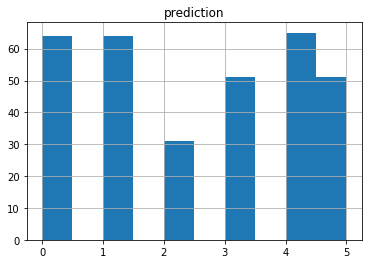

In [53]:
train_pre=model.transform(train)
train_pre.select("prediction").toPandas().hist()
train_pre.show()

+-----+---------------------+------------------------------------+---------------------------+--------------------+----------+
|value|Livestock_Primary_egg|Beef_and_bufallo(kilograms_per_year)|Poultry(kilograms_per_year)|            features|prediction|
+-----+---------------------+------------------------------------+---------------------------+--------------------+----------+
|    2|                    1|                                  11|                         14| [2.0,1.0,11.0,14.0]|         0|
|    2|                    1|                                  14|                         42| [2.0,1.0,14.0,42.0]|         2|
|    2|                    1|                                  15|                         44| [2.0,1.0,15.0,44.0]|         2|
|    2|                    2|                                  12|                         33| [2.0,2.0,12.0,33.0]|         2|
|    2|                    5|                                   3|                          1|   [2.0,5.0,3.0,1

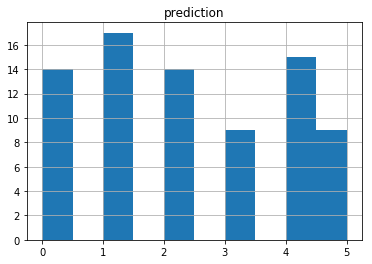

In [54]:
test_pre=model.transform(test)
test_pre.select("prediction").toPandas().hist()
test_pre.show()

<function matplotlib.pyplot.show(*args, **kw)>

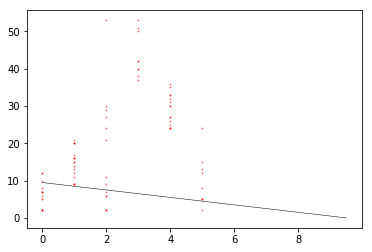

In [60]:
import matplotlib.pyplot as plt
value=test_pre.select("value").toPandas()
per=test_pre.select("prediction").toPandas()
plt.scatter(per, value, s=1, c="red", alpha=0.4)
plt.plot([0,9.5],[9.5,0],linewidth = '0.5',color='#000000')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

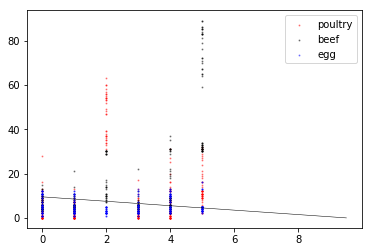

In [68]:
egg=train_pre.select("Livestock_Primary_egg").toPandas()
poultry=train_pre.select("Poultry(kilograms_per_year)").toPandas()
beef=train_pre.select("Beef_and_bufallo(kilograms_per_year)").toPandas()
per1=train_pre.select("prediction").toPandas()
plt.scatter(per1, poultry, s=1, c="red", alpha=0.4,label="poultry")
plt.scatter(per1, beef, s=1, c="black", alpha=0.4,label="beef")
plt.scatter(per1, egg, s=1, c="blue", alpha=0.4,label="egg")
plt.plot([0,9.5],[9.5,0],linewidth = '0.5',color='#000000')
plt.legend()
plt.show

In [1]:
%pwd

'/home/ubuntu'